In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

In [ ]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

In [ ]:
!wget https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg

--2021-10-27 14:04:09--  https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg
Resolving www.shrednations.com (www.shrednations.com)... 173.255.203.102
Connecting to www.shrednations.com (www.shrednations.com)|173.255.203.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476829 (466K) [image/jpeg]
Saving to: ‘corporate-espionage.jpg’

corporate-espionage 100%[===================>] 465.65K  --.-KB/s    in 0.1s    

2021-10-27 14:04:10 (3.22 MB/s) - ‘corporate-espionage.jpg’ saved [476829/476829]



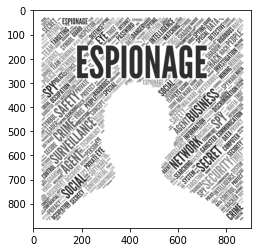

900 900


In [ ]:
img = cv2.imread('corporate-espionage.jpg', 0)
plt.imshow(img, 'gray')
plt.show()
height, width  = img.shape
print(width, height)

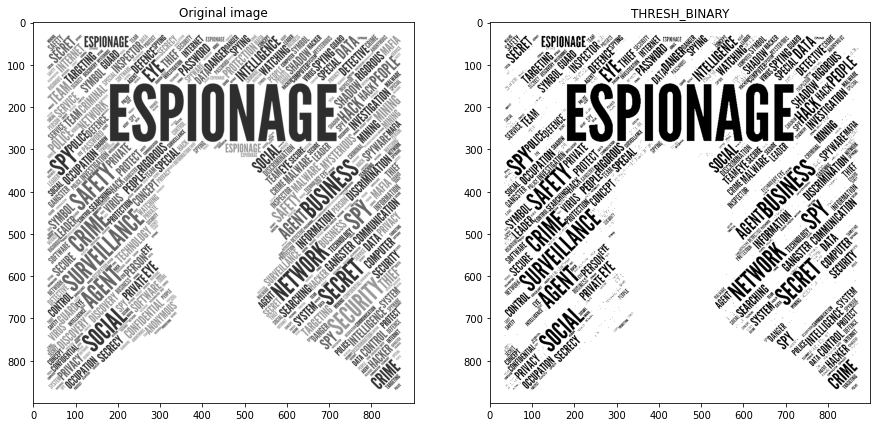

In [ ]:
ret, binary_img = cv2.threshold(img, 128, 1, cv2.THRESH_BINARY)

# Plot the images
images = [img, binary_img]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

In [ ]:
#3x3 팽창(dilatioin) 함수 작성
def dilation_3x3(img):
    # 함수 작성
    r, c = img.shape
    pad_img = img.copy()
    pad_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
    output_img = img.copy()
    
    for i in range(0,r):
      for j in range(0,c):
        boundary = pad_img[i:i+3, j:j+3] - kernel
        if(np.min(boundary) == -1):
          output_img[i,j] = 0
        else:
          output_img[i,j] = 1

    return output_img


#3x3 침식(erosion) 함수 작성
def erosion_3x3(img):
    # 함수 작성
    r, c = img.shape
    pad_img = img.copy()
    pad_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
    output_img = img.copy()

    for i in range(0,r):
      for j in range(0,c):
        boundary = pad_img[i:i+3, j:j+3] - kernel
        if(boundary[0,1]+boundary[1,0]+boundary[1,1]+boundary[1,2]+boundary[2,1] == -5):
          output_img[i,j] = 0
        else:
          output_img[i,j] = 1

    return output_img

#3x3 열기(open) 함수 작성
def open_3x3(img):
    # 함수 작성
    img = erosion_3x3(img)
    output_img = dilation_3x3(img)
    return output_img

#3x3 닫기(close) 함수 작성
def Close_3x3(img):
    # 함수 작성
    img = dilation_3x3(img)
    output_img = erosion_3x3(img)
    return output_img

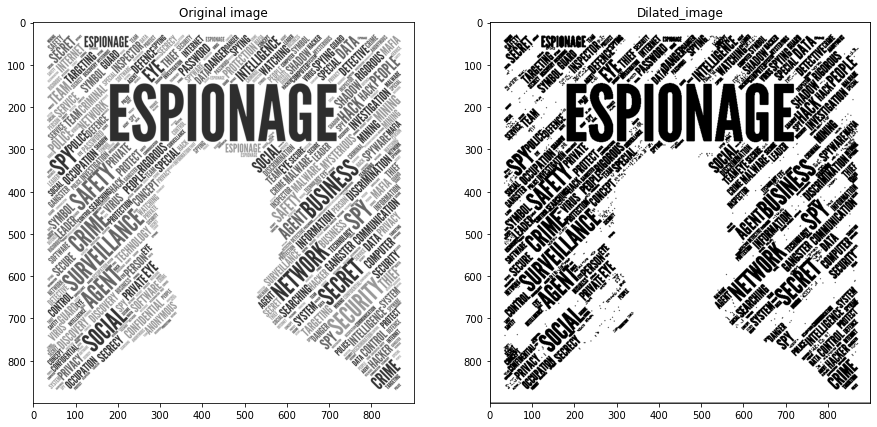

In [ ]:
# 3x3 팽창(dilation) 결과 출력
dilated_img = dilation_3x3(binary_img)
images = [img, dilated_img]
titles = ['Original image', 'Dilated_image']
plot_img(images, titles)

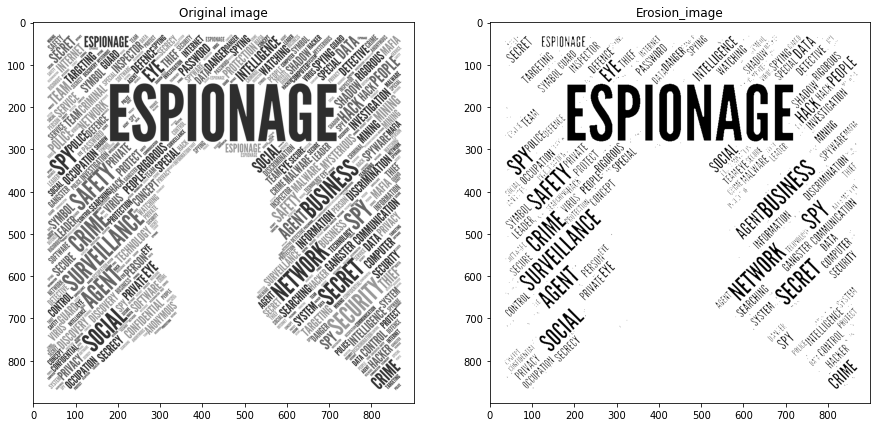

In [ ]:
# 3x3 침식(erosion) 결과 출력
erosion_img = erosion_3x3(binary_img)

images = [img, erosion_img]
titles = ['Original image', 'Erosion_image']
plot_img(images, titles)

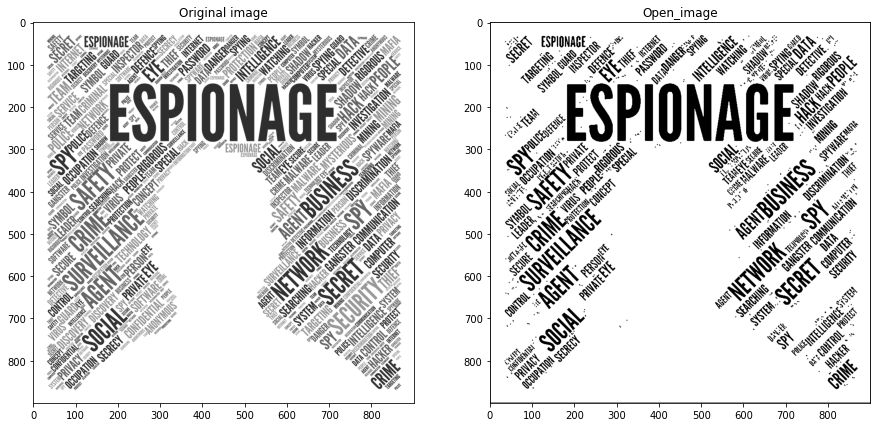

In [ ]:
# 3x3 열기(openning) 결과 출력
open_img = open_3x3(binary_img)

images = [img, open_img]
titles = ['Original image', 'Open_image']
plot_img(images, titles)

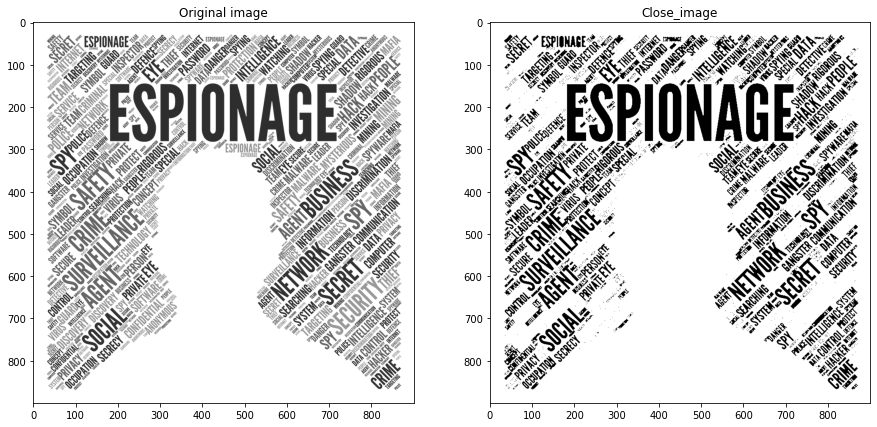

In [ ]:
# 3x3 닫기(closing) 결과 출력
close_img = Close_3x3(binary_img)

images = [img, close_img]
titles = ['Original image', 'Close_image']
plot_img(images, titles)

In [ ]:
#5x5 팽창(dilatioin) 함수 작성
def dilation_5x5(img):
    # 함수 작성
    r, c = img.shape
    pad_img = img.copy()
    pad_img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)
    kernel = np.array([[0, 0, 1, 0, 0],[0, 0, 1, 0, 0],[1, 1, 1, 1, 1],[0, 0, 1, 0, 0],[0, 0, 1, 0, 0]])
    output_img = img.copy()
    
    for i in range(0,r):
      for j in range(0,c):
        boundary = pad_img[i:i+5, j:j+5] - kernel
        if(np.min(boundary) == -1):
          output_img[i,j] = 0
        else:
          output_img[i,j] = 1
          
    return output_img

#5x5 침식(erosion) 함수 작성
def erosion_5x5(img):
    # 함수 작성
    r, c = img.shape
    pad_img = img.copy()
    pad_img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)
    kernel = np.array([[0, 0, 1, 0, 0],[0, 0, 1, 0, 0],[1, 1, 1, 1, 1],[0, 0, 1, 0, 0],[0, 0, 1, 0, 0]])
    output_img = img.copy()

    for i in range(0,r):
      for j in range(0,c):
        boundary = pad_img[i:i+5, j:j+5] - kernel
        if(boundary[0,2]+boundary[1,2]+boundary[2,0]+boundary[2,1]+boundary[2,2]+boundary[2,3]+boundary[2,4]+boundary[3,2]+boundary[4,2] == -9):
          output_img[i,j] = 0
        else:
          output_img[i,j] = 1
    return output_img
 
#5x5 열기(open) 함수 작성
def open_5x5(img):
    # 함수 작성
    img = erosion_5x5(img)
    output_img = dilation_5x5(img)
    return output_img

#5x5 닫기(close) 함수 작성
def Close_5x5(img):
    # 함수 작성
    img = dilation_5x5(img)
    output_img = erosion_5x5(img)
    return output_img

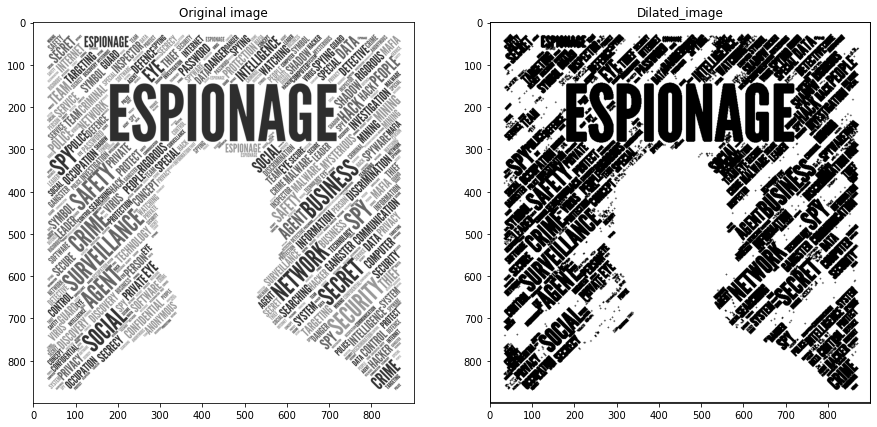

In [ ]:
# 5x5 팽창(dilation) 결과 출력
dilated_img = dilation_5x5(binary_img)
images = [img, dilated_img]
titles = ['Original image', 'Dilated_image']
plot_img(images, titles)

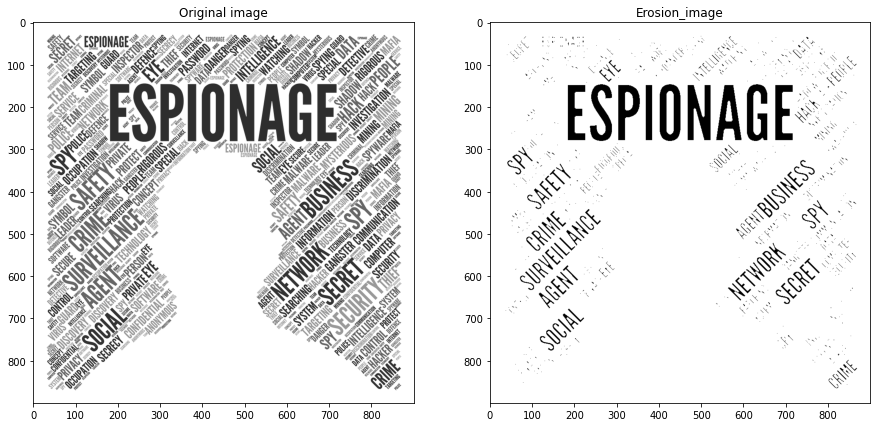

In [ ]:
# 5x5 침식(erosion) 결과 출력
erosion_img = erosion_5x5(binary_img)
images = [img, erosion_img]
titles = ['Original image', 'Erosion_image']
plot_img(images, titles)

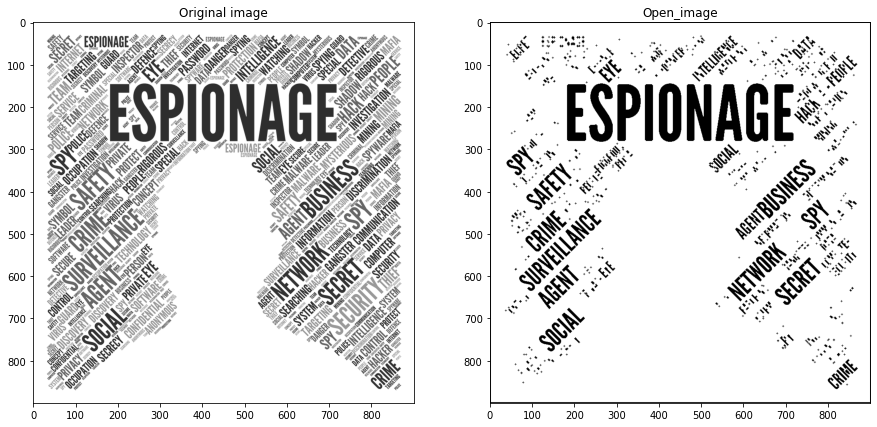

In [ ]:
# 5x5 열기(openning) 결과 출력
open_img = open_5x5(binary_img)

images = [img, open_img]
titles = ['Original image', 'Open_image']
plot_img(images, titles)

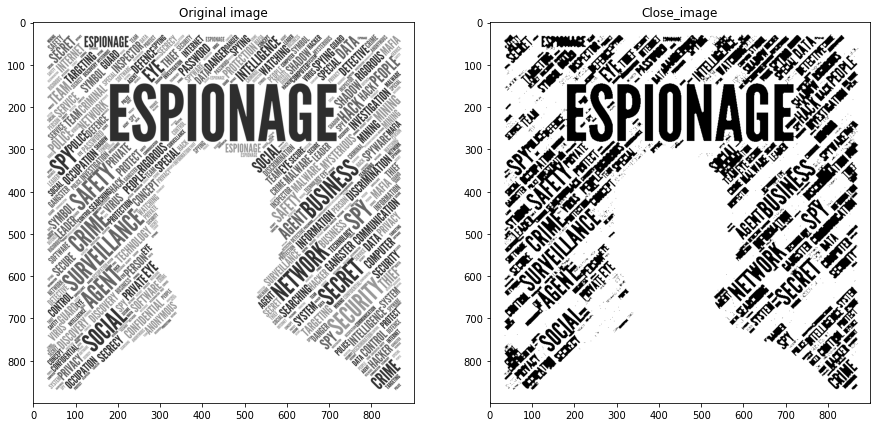

In [ ]:
# 5x5 닫기(closing) 결과 출력
close_img = Close_5x5(binary_img)

images = [img, close_img]
titles = ['Original image', 'Close_image']
plot_img(images, titles)